In [137]:
library(tidyverse)
library(dplyr)
library(ggplot2)

In [57]:
ball_by_ball = read_csv("./Data/Ball_by_Ball.csv")
player = read_csv("./Data/Player.csv")
country = read_csv("./Data/Country.csv")
batting_style = read.csv("./Data/Batting_Style.csv")
wicket_taken = read.csv("./Data/wicket_taken.csv")
bowling_style = read.csv("./Data/Bowling_Style.csv")
batsman_scored = read.csv("./Data/batsman_scored.csv")
data <- read.csv("./Data/deliveries.csv")
matches <- read.csv("./Data/Match.csv")
matches <- matches[,-18]
data$wickets <- as.numeric(ifelse(data$player_dismissed =="" ,"",1))

Parsed with column specification:
cols(
  Match_Id = col_double(),
  Over_Id = col_double(),
  Ball_Id = col_double(),
  Innings_No = col_double(),
  Team_Batting = col_double(),
  Team_Bowling = col_double(),
  Striker_Batting_Position = col_double(),
  Striker = col_double(),
  Non_Striker = col_double(),
  Bowler = col_double()
)
Parsed with column specification:
cols(
  Player_Id = col_double(),
  Player_Name = col_character(),
  DOB = col_character(),
  Batting_Id = col_double(),
  Bowling_Id = col_double(),
  Country_Id = col_double()
)
Parsed with column specification:
cols(
  Country_Id = col_double(),
  Country_Name = col_character()
)


In [58]:
teams <- data %>% select(batting_team)%>%
  distinct()
teams

batting_team               
1  Kolkata Knight Riders      
2  Royal Challengers Bangalore
3  Chennai Super Kings        
4  Kings XI Punjab            
5  Rajasthan Royals           
6  Delhi Daredevils           
7  Mumbai Indians             
8  Deccan Chargers            
9  Kochi Tuskers Kerala       
10 Pune Warriors              
11 Sunrisers Hyderabad        
12 Rising Pune Supergiants    
13 Gujarat Lions

In [102]:
matches %>% summarise(match_count = n())

match_count
1 637

In [59]:
Player_Prizes <- data.frame(Playername="",Teamname="",Prize="",Ipl_Season="")


In [63]:
teams <- rename(teams, team = batting_team)
teams

team                       
1  Kolkata Knight Riders      
2  Royal Challengers Bangalore
3  Chennai Super Kings        
4  Kings XI Punjab            
5  Rajasthan Royals           
6  Delhi Daredevils           
7  Mumbai Indians             
8  Deccan Chargers            
9  Kochi Tuskers Kerala       
10 Pune Warriors              
11 Sunrisers Hyderabad        
12 Rising Pune Supergiants    
13 Gujarat Lions

In [64]:
s_team <- c("KKR","RCB","CSK","KXIP","RR","DD","MI","DC","KTK","PWI","SRH","RPS","GL")
teams <- cbind(teams, s_team)
teams

team                        s_team
1  Kolkata Knight Riders       KKR   
2  Royal Challengers Bangalore RCB   
3  Chennai Super Kings         CSK   
4  Kings XI Punjab             KXIP  
5  Rajasthan Royals            RR    
6  Delhi Daredevils            DD    
7  Mumbai Indians              MI    
8  Deccan Chargers             DC    
9  Kochi Tuskers Kerala        KTK   
10 Pune Warriors               PWI   
11 Sunrisers Hyderabad         SRH   
12 Rising Pune Supergiants     RPS   
13 Gujarat Lions               GL

In [136]:
ManOfMach <- matches%>% select(Match_SK,ManOfMach,Season_Year) %>%
  distinct()
ManOfMach


Match_SK ManOfMach        Season_Year
1    0       BB McCullum      2008       
2    1       MEK Hussey       2008       
3    2       MF Maharoof      2008       
4    3       MV Boucher       2008       
5    4       DJ Hussey        2008       
6    5       SR Watson        2008       
7    6       V Sehwag         2008       
8    7       ML Hayden        2008       
9    8       YK Pathan        2008       
10   9       KC Sangakkara    2008       
11  10       SR Watson        2008       
12  11       JDP Oram         2008       
13  12       AC Gilchrist     2008       
14  13       SM Katich        2008       
15  14       MS Dhoni         2008       
16  15       ST Jayasuriya    2008       
17  16       GD McGrath       2008       
18  17       SE Marsh         2008       
19  18       SA Asnodkar      2008       
20  19       V Sehwag         2008       
21  20       R Vinay Kumar    2008       
22  21       IK Pathan        2008       
23  22       SM Pollock       2008       
24  23       Sohail Tanvir    2008       
25  24       S Sreesanth      2008       
26  25       AC Gilchrist     2008       
27  26       A Nehra          2008       
28  27       MS Dhoni         2008       
29  28       SC Ganguly       2008       
30  29       YK Pathan        2008       
... ...      ...              ...        
608 607      AJ Tye           2017       
609 608      G Gambhir        2017       
610 609      Rashid Khan      2017       
611 610      LH Ferguson      2017       
612 611      KH Pandya        2017       
613 612      Sandeep Sharma   2017       
614 613      DA Warner        2017       
615 614      RG Sharma        2017       
616 615      BA Stokes        2017       
617 616      Mohammed Shami   2017       
618 617      RA Tripathi      2017       
619 618      RR Pant          2017       
620 619      Sandeep Sharma   2017       
621 620      JD Unadkat       2017       
622 621      LMP Simmons      2017       
623 622      SP Narine        2017       
624 623      DR Smith         2017       
625 624      S Dhawan         2017       
626 625      MM Sharma        2017       
627 626      SS Iyer          2017       
628 627      WP Saha          2017       
629 628      KK Nair          2017       
630 629      Mohammed Siraj   2017       
631 630      AT Rayudu        2017       
632 631      JD Unadkat       2017       
633 632      HV Patel         2017       
634 633      Wasington Sundar 2017       
635 634      NM Coulter-Nile  2017       
636 635      KV Sharma        2017       
637 636      KH Pandya        2017

In [66]:
Season_Year <- data.frame(Season_Year=c(2008,2009,2010,2011,2012,2013,2014,2015,2016),T_winner=c("Rajasthan Royals","Deccan Chargers","Chennai Super Kings","Chennai Super Kings","Kolkata Knight Riders","Mumbai Indians","Kolkata Knight Riders","Mumbai Indians","Sunrisers Hyderabad"))


In [67]:
matches$City_Name <- as.character(matches$City_Name)
matches$City_Name[matches$City_Name==""] <- "Dubai"
venue_city <- matches %>%
            select(City_Name)%>%
  distinct()
venue_city

City_Name         
1  Bangalore         
2  Chandigarh        
3  Delhi             
4  Mumbai            
5  Kolkata           
6  Jaipur            
7  Hyderabad         
8  Chennai           
9  Cape Town         
10 Port Elizabeth    
11 Durban            
12 Centurion         
13 East London       
14 Johannesburg      
15 Kimberley         
16 Bloemfontein      
17 Ahmedabad         
18 Cuttack           
19 Nagpur            
20 Dharamsala        
21 Kochi             
22 Indore            
23 Visakhapatnam     
24 Pune              
25 Raipur            
26 Ranchi            
27 Abu Dhabi         
28 Rajkot            
29 Kanpur            
30 Hyderabad (Deccan)
31 Bengaluru         
32 Mohali

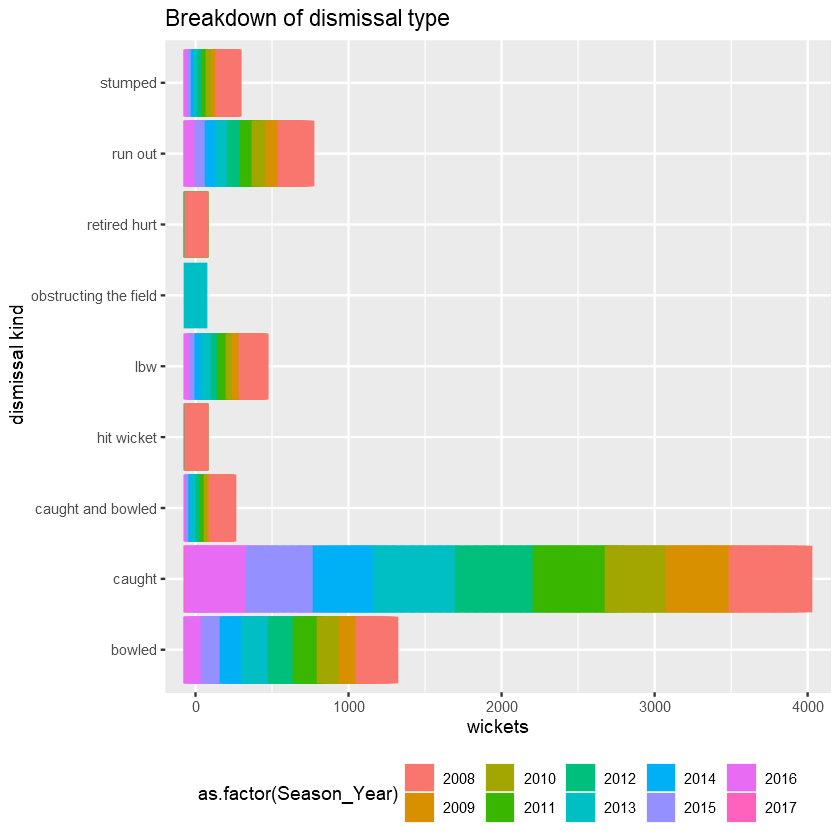

In [69]:
dismissal <- data%>%
  left_join(matches, by=c("match_id"="Match_SK"))%>%
   left_join(teams,by=c("batting_team"="team"))%>%
  filter(dismissal_kind!="")%>%
  group_by(Season_Year,dismissal_kind,s_team)%>%
  summarize(wickets =n())


ggplot(dismissal,aes(x=dismissal_kind,y=wickets,colour=as.factor(Season_Year),fill=as.factor(Season_Year)))+
  geom_bar(position = "stack", show.legend = TRUE, width =.6,stat="identity", size=5)+ 
      theme(legend.position="bottom")+
     coord_flip()+
  theme(legend.direction = "horizontal") +
  scale_y_continuous(name="wickets")+
    scale_x_discrete(name="dismissal kind")+
                     ggtitle("Breakdown of dismissal type")

 

In [71]:
write.csv(dismissal,"Dis.csv")

[1] "batsman"     "Season_Year" "s_team"      "runs"

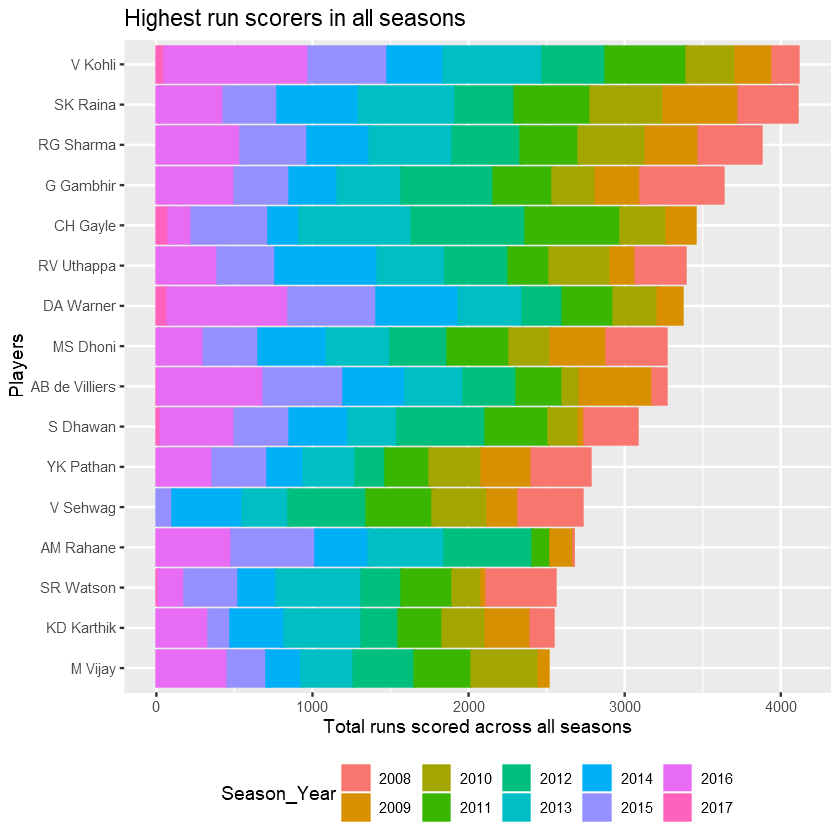

In [74]:
runs_h <- data%>%
        left_join(matches,by=c("match_id"="Match_SK"))%>%
  left_join(teams,by=c("batting_team"="team"))%>%
select(batsman,Season_Year,s_team,batsman_runs)%>%
group_by(batsman,Season_Year,s_team)%>%
summarize(runs=sum(batsman_runs))%>%
arrange(desc(batsman))

run_gh<-runs_h%>%
  group_by(batsman)%>%
  summarize(runs_t=sum(runs))

runs_ht <- merge(runs_h,run_gh)
runs_ht <- runs_ht%>%
  arrange(desc(runs_t))%>%
  filter(runs_t>2500)
  
  
runs_ht$Season_Year<-as.character(runs_ht$Season_Year)
runs_ht$batsman <- factor(runs_ht$batsman, levels = run_gh$batsman[order(run_gh$runs_t)])

ggplot(runs_ht,aes(x=batsman,y=runs,colour=Season_Year,fill=Season_Year))+
  geom_bar(position = "stack",stat = "identity", size=0.5)+
        theme(legend.position="bottom")+
  coord_flip()+
        scale_y_continuous(name="Total runs scored across all seasons")+
  scale_x_discrete(name="Players")+
  ggtitle("Highest run scorers in all seasons")

colnames(runs_h)


In [75]:
top_10 <- runs_ht %>% select(batsman) %>%
distinct() %>%
head(10)
top_10

batsman       
1  V Kohli       
2  SK Raina      
3  RG Sharma     
4  G Gambhir     
5  CH Gayle      
6  RV Uthappa    
7  DA Warner     
8  AB de Villiers
9  MS Dhoni      
10 S Dhawan

In [76]:
top_10 <- rename(top_10, Top_Batsman = batsman)
full <- merge(x=data, y=top_10)

match_id inning batting_team                bowling_team               
1       1        1      Kolkata Knight Riders       Royal Challengers Bangalore
2       1        1      Kolkata Knight Riders       Royal Challengers Bangalore
3       1        1      Kolkata Knight Riders       Royal Challengers Bangalore
4       1        1      Kolkata Knight Riders       Royal Challengers Bangalore
5       1        1      Kolkata Knight Riders       Royal Challengers Bangalore
6       1        1      Kolkata Knight Riders       Royal Challengers Bangalore
7       1        1      Kolkata Knight Riders       Royal Challengers Bangalore
8       1        1      Kolkata Knight Riders       Royal Challengers Bangalore
9       1        1      Kolkata Knight Riders       Royal Challengers Bangalore
10      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
11      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
12      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
13      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
14      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
15      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
16      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
17      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
18      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
19      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
20      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
21      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
22      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
23      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
24      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
25      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
26      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
27      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
28      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
29      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
30      1        1      Kolkata Knight Riders       Royal Challengers Bangalore
...     ...      ...    ...                         ...                        
1365951 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365952 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365953 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365954 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365955 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365956 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365957 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365958 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365959 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365960 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365961 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365962 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365963 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365964 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365965 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365966 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365967 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365968 577      2      Royal Challengers Bangalore Sunrisers Hyderabad        
1365969 

In [78]:
wickets_h <- data%>%
        left_join(matches,by=c("match_id"="Match_SK"))%>%
  left_join(teams,by=c("bowling_team"="team"))%>%
  filter(dismissal_kind!="run out")%>%
select(bowler,batsman,wickets,player_dismissed)%>%
group_by(bowler,batsman,player_dismissed)%>%
summarize(playerdismissed=sum(wickets,na.rm=TRUE))%>%
filter(player_dismissed!="")%>%
filter(batsman=="V Kohli", max(playerdismissed))%>%
arrange(desc(bowler))

colnames(wickets_h) 

[1] "bowler"           "batsman"          "player_dismissed" "playerdismissed"

In [79]:
wickets_h %>% mutate(playerdismissed = as.integer(playerdismissed))
#wickets_h %>% group_by(max(playerdismissed))


bowler            batsman player_dismissed playerdismissed
1   Z Khan            V Kohli V Kohli          1              
2   WPUJC Vaas        V Kohli V Kohli          1              
3   VRV Singh         V Kohli V Kohli          1              
4   UT Yadav          V Kohli V Kohli          1              
5   TG Southee        V Kohli V Kohli          1              
6   SR Watson         V Kohli V Kohli          1              
7   SP Narine         V Kohli V Kohli          2              
8   Sohail Tanvir     V Kohli V Kohli          1              
9   SK Warne          V Kohli V Kohli          1              
10  SK Trivedi        V Kohli V Kohli          2              
11  SK Raina          V Kohli V Kohli          1              
12  SB Jakati         V Kohli V Kohli          2              
13  Sandeep Sharma    V Kohli V Kohli          4              
14  RS Bopara         V Kohli V Kohli          1              
15  RP Singh          V Kohli V Kohli          2              
16  RJ Harris         V Kohli V Kohli          2              
17  RA Jadeja         V Kohli V Kohli          2              
18  R Vinay Kumar     V Kohli V Kohli          1              
19  R Sharma          V Kohli V Kohli          1              
20  PV Tambe          V Kohli V Kohli          1              
21  PP Ojha           V Kohli V Kohli          1              
22  PP Chawla         V Kohli V Kohli          3              
23  Pankaj Singh      V Kohli V Kohli          1              
24  P Suyal           V Kohli V Kohli          1              
25  P Kumar           V Kohli V Kohli          1              
26  P Awana           V Kohli V Kohli          2              
27  NLTC Perera       V Kohli V Kohli          1              
28  Mustafizur Rahman V Kohli V Kohli          1              
29  MS Gony           V Kohli V Kohli          1              
30  Mohammed Shami    V Kohli V Kohli          1              
... ...               ...     ...              ...            
38  KW Richardson     V Kohli V Kohli          1              
39  KH Pandya         V Kohli V Kohli          1              
40  KC Cariappa       V Kohli V Kohli          1              
41  KA Pollard        V Kohli V Kohli          3              
42  JP Faulkner       V Kohli V Kohli          1              
43  Joginder Sharma   V Kohli V Kohli          1              
44  JJ Bumrah         V Kohli V Kohli          1              
45  JH Kallis         V Kohli V Kohli          3              
46  JA Morkel         V Kohli V Kohli          2              
47  IK Pathan         V Kohli V Kohli          3              
48  DS Kulkarni       V Kohli V Kohli          3              
49  DE Bollinger      V Kohli V Kohli          1              
50  DAJ Bracewell     V Kohli V Kohli          1              
51  CH Morris         V Kohli V Kohli          1              
52  C Nanda           V Kohli V Kohli          1              
53  BJ Hodge          V Kohli V Kohli          1              
54  Bipul Sharma      V Kohli V Kohli          1              
55  BB Sran           V Kohli V Kohli          1              
56  B Kumar           V Kohli V Kohli          2              
57  Azhar Mahmood     V Kohli V Kohli          1              
58  Anureet Singh     V Kohli V Kohli          1              
59  AN Ahmed          V Kohli V Kohli          1              
60  AD Russell        V Kohli V Kohli          1              
61  AD Mathews        V Kohli V Kohli          1              
62  AC Thomas         V Kohli V Kohli          1              
63  AB Dinda          V Kohli V Kohli          2              
64  A Symonds         V Kohli V Kohli          1              
65  A Nehra           V Kohli V Kohli          6              
66  A Mishra          V Kohli V Kohli          1              
67  A Ashish Reddy    V Kohli V Kohli          2

In [80]:
No2 <- data%>%
        left_join(matches,by=c("match_id"="Match_SK"))%>%
  left_join(teams,by=c("bowling_team"="team"))%>%
  filter(dismissal_kind!="run out")%>%
select(bowler,batsman,wickets,player_dismissed)%>%
group_by(bowler,batsman,player_dismissed)%>%
summarize(playerdismissed=sum(wickets,na.rm=TRUE))%>%
filter(player_dismissed!="")%>%
filter(batsman=="SK Raina")%>%
arrange(desc(bowler))



In [81]:
No3 <- data%>%
        left_join(matches,by=c("match_id"="Match_SK"))%>%
  left_join(teams,by=c("bowling_team"="team"))%>%
  filter(dismissal_kind!="run out")%>%
select(bowler,batsman,wickets,player_dismissed)%>%
group_by(bowler,batsman,player_dismissed)%>%
summarize(playerdismissed=sum(wickets,na.rm=TRUE))%>%
filter(player_dismissed!="")%>%
filter(batsman=="RG Sharma")%>%
arrange(desc(bowler))

In [82]:
No4 <- data%>%
        left_join(matches,by=c("match_id"="Match_SK"))%>%
  left_join(teams,by=c("bowling_team"="team"))%>%
  filter(dismissal_kind!="run out")%>%
select(bowler,batsman,wickets,player_dismissed)%>%
group_by(bowler,batsman,player_dismissed)%>%
summarize(playerdismissed=sum(wickets,na.rm=TRUE))%>%
filter(player_dismissed!="")%>%
filter(batsman=="G Gambhir")%>%
arrange(desc(bowler))

In [83]:
No5 <- data%>%
        left_join(matches,by=c("match_id"="Match_SK"))%>%
  left_join(teams,by=c("bowling_team"="team"))%>%
  filter(dismissal_kind!="run out")%>%
select(bowler,batsman,wickets,player_dismissed)%>%
group_by(bowler,batsman,player_dismissed)%>%
summarize(playerdismissed=sum(wickets,na.rm=TRUE))%>%
filter(player_dismissed!="")%>%
filter(batsman=="CH Gayle")%>%
arrange(desc(bowler))

In [84]:
No6 <- data%>%
        left_join(matches,by=c("match_id"="Match_SK"))%>%
  left_join(teams,by=c("bowling_team"="team"))%>%
  filter(dismissal_kind!="run out")%>%
select(bowler,batsman,wickets,player_dismissed)%>%
group_by(bowler,batsman,player_dismissed)%>%
summarize(playerdismissed=sum(wickets,na.rm=TRUE))%>%
filter(player_dismissed!="")%>%
filter(batsman=="RV Uthappa")%>%
arrange(desc(bowler))

In [85]:
No7 <- data%>%
        left_join(matches,by=c("match_id"="Match_SK"))%>%
  left_join(teams,by=c("bowling_team"="team"))%>%
  filter(dismissal_kind!="run out")%>%
select(bowler,batsman,wickets,player_dismissed)%>%
group_by(bowler,batsman,player_dismissed)%>%
summarize(playerdismissed=sum(wickets,na.rm=TRUE))%>%
filter(player_dismissed!="")%>%
filter(batsman=="DA Warner")%>%
arrange(desc(bowler))

In [86]:
No8 <- data%>%
        left_join(matches,by=c("match_id"="Match_SK"))%>%
  left_join(teams,by=c("bowling_team"="team"))%>%
  filter(dismissal_kind!="run out")%>%
select(bowler,batsman,wickets,player_dismissed)%>%
group_by(bowler,batsman,player_dismissed)%>%
summarize(playerdismissed=sum(wickets,na.rm=TRUE))%>%
filter(player_dismissed!="")%>%
filter(batsman=="AB de Villiers")%>%
arrange(desc(bowler))

In [87]:
No9 <- data%>%
        left_join(matches,by=c("match_id"="Match_SK"))%>%
  left_join(teams,by=c("bowling_team"="team"))%>%
  filter(dismissal_kind!="run out")%>%
select(bowler,batsman,wickets,player_dismissed)%>%
group_by(bowler,batsman,player_dismissed)%>%
summarize(playerdismissed=sum(wickets,na.rm=TRUE))%>%
filter(player_dismissed!="")%>%
filter(batsman=="MS Dhoni")%>%
arrange(desc(bowler))

In [88]:
No10 <- data%>%
        left_join(matches,by=c("match_id"="Match_SK"))%>%
  left_join(teams,by=c("bowling_team"="team"))%>%
  filter(dismissal_kind!="run out")%>%
select(bowler,batsman,wickets,player_dismissed)%>%
group_by(bowler,batsman,player_dismissed)%>%
summarize(playerdismissed=sum(wickets,na.rm=TRUE))%>%
filter(player_dismissed!="")%>%
filter(batsman=="S Dhawan")%>%
arrange(desc(bowler))

In [89]:
Raina <- No2 %>% arrange(desc(playerdismissed))%>%
head(1)
Raina

bowler    batsman  player_dismissed playerdismissed
1 PP Chawla SK Raina SK Raina         4

In [90]:
Virat <- wickets_h %>% arrange(desc(playerdismissed))%>%
head(1)
Virat

bowler  batsman player_dismissed playerdismissed
1 A Nehra V Kohli V Kohli          6

In [91]:
Sharma <- No3 %>% arrange(desc(playerdismissed))%>%
head(1)
Sharma

bowler        batsman   player_dismissed playerdismissed
1 R Vinay Kumar RG Sharma RG Sharma        6

In [92]:
Gambhir <- No4 %>% arrange(desc(playerdismissed))%>%
head(1)
Gambhir

bowler batsman   player_dismissed playerdismissed
1 Z Khan G Gambhir G Gambhir        5

In [93]:
Gayle <- No5 %>% arrange(desc(playerdismissed))%>%
head(1)
Gayle

bowler   batsman  player_dismissed playerdismissed
1 R Ashwin CH Gayle CH Gayle         4

In [94]:
Robin <- No6 %>% arrange(desc(playerdismissed))%>%
head(1)
Robin

bowler   batsman    player_dismissed playerdismissed
1 R Ashwin RV Uthappa RV Uthappa       4

In [95]:
David <- No7 %>% arrange(desc(playerdismissed))%>%
head(1)
David

bowler   batsman   player_dismissed playerdismissed
1 UT Yadav DA Warner DA Warner        3

In [96]:
AB <- No8 %>% arrange(desc(playerdismissed))%>%
head(1)
AB

bowler    batsman        player_dismissed playerdismissed
1 PP Chawla AB de Villiers AB de Villiers   4

In [97]:
MS <- No9 %>% arrange(desc(playerdismissed))%>%
head(1)
MS

bowler batsman  player_dismissed playerdismissed
1 Z Khan MS Dhoni MS Dhoni         7

In [98]:
Shekar <- No10 %>% arrange(desc(playerdismissed))%>%
head(1)
Shekar

bowler batsman  player_dismissed playerdismissed
1 Z Khan S Dhawan S Dhawan         4

In [99]:
Final_List <- rbind(Virat,Raina,Sharma,Gambhir,Gayle,Robin,David,AB,MS,Shekar)

In [100]:
Final_List

bowler        batsman        player_dismissed playerdismissed
1  A Nehra       V Kohli        V Kohli          6              
2  PP Chawla     SK Raina       SK Raina         4              
3  R Vinay Kumar RG Sharma      RG Sharma        6              
4  Z Khan        G Gambhir      G Gambhir        5              
5  R Ashwin      CH Gayle       CH Gayle         4              
6  R Ashwin      RV Uthappa     RV Uthappa       4              
7  UT Yadav      DA Warner      DA Warner        3              
8  PP Chawla     AB de Villiers AB de Villiers   4              
9  Z Khan        MS Dhoni       MS Dhoni         7              
10 Z Khan        S Dhawan       S Dhawan         4

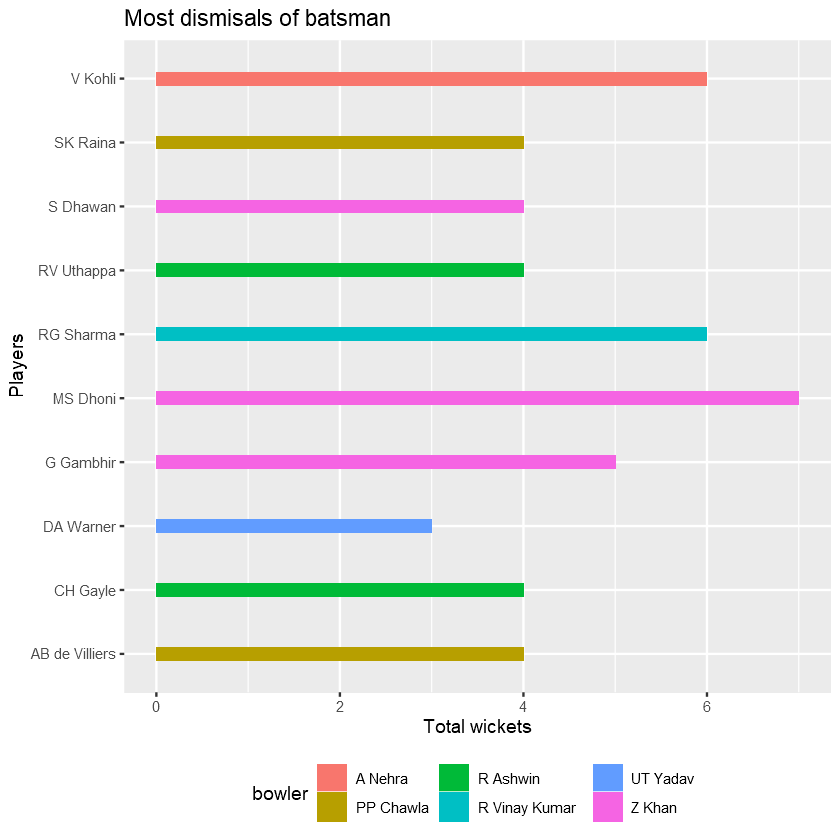

In [101]:
ggplot(Final_List,aes(x=batsman,y=playerdismissed,colour=bowler,fill=bowler))+
  geom_bar(position = "stack",stat = "identity",width=0.2,size=0.00005)+
        theme(legend.position="bottom")+
  coord_flip()+
        scale_y_continuous(name="Total wickets")+
  scale_x_discrete(name="Players")+
  ggtitle("Most dismisals of batsman")

In [104]:
matches %>% group_by(match_winner) %>% summarise(winner_cnt = n()) %>%
  filter(winner_cnt == max(winner_cnt))

match_winner   winner_cnt
1 Mumbai Indians 91

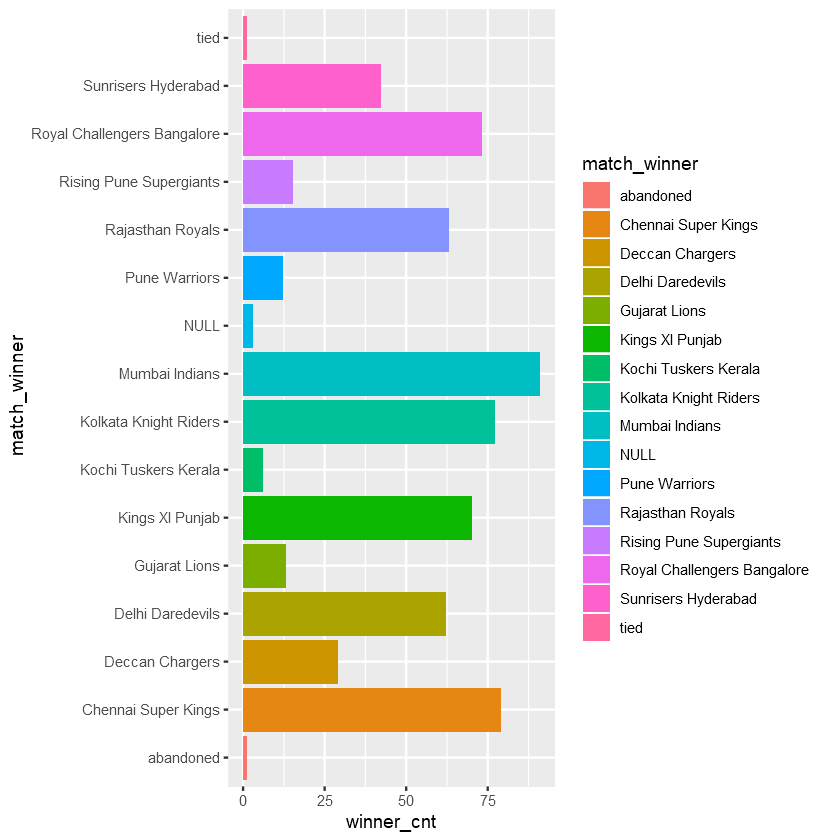

In [135]:
successfull_team = matches %>% group_by(match_winner) %>% summarise(winner_cnt = n())
Box_successfull_team = ggplot(successfull_team) + geom_bar(aes(match_winner,winner_cnt, fill = match_winner), stat = 'identity') + coord_flip()
Box_successfull_team

In [122]:
y=0
n=0
  for(i in seq(1,nrow(matches)))
  {
      if (matches$Toss_Winner[i] == matches$match_winner[i])
    y=y+1
    else 
    n=n+1
  }

if (y >= n)
{
print(paste("Yes, Toss-winning helped in winning matches."))
  print(paste("Matches won by toss_winner are: ", y, "& Total matches: ", nrow(matches)))
} else

{
 print(paste("No, Toss-winning didn't help in winning matches."))
  print(paste("Matches won by other team are: ", n, "& Total matches: ", nrow(matches))) 
}

[1] "Yes, Toss-winning helped in winning matches."
[1] "Matches won by toss_winner are:  324 & Total matches:  637"


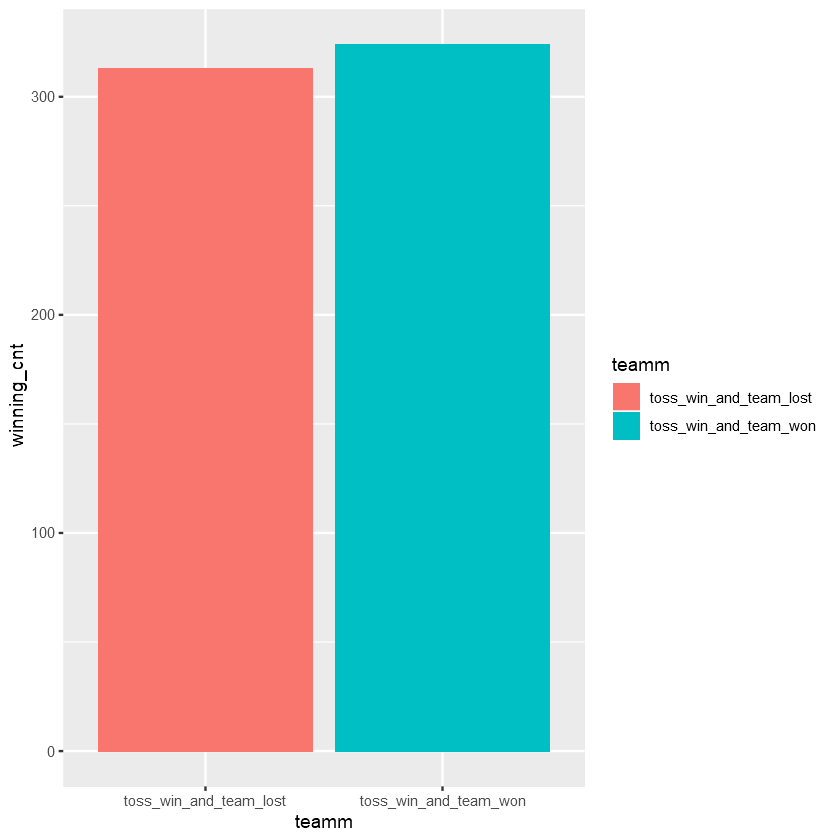

In [131]:
winning_cnt = c(y,n)
teamm = c("toss_win_and_team_won" , "toss_win_and_team_lost")
df = data.frame(teamm,winning_cnt, stringsAsFactors = F)

toss_sts = ggplot(df) + geom_bar(aes(teamm,winning_cnt, fill = teamm), 
                    stat = 'identity')
toss_sts